In [1]:
import pandas as pd
import numpy as np
import gzip
from sklearn.feature_extraction.text import CountVectorizer
import math
from scipy import sparse
from scipy.sparse import csr_matrix
with_rationale_accuracy = []
with_rationale_auc = []
without_rationale_accuracy = []
without_rationale_auc = []
test_seed=[]

In [78]:
data = pd.read_excel("/Users/charusaxena/downloads/product_review.xlsx")
Dataframe= data.copy()


In [79]:
text=Dataframe['reviewText']
lables = Dataframe['ratings']
text.size,lables.size

(1000, 1000)

In [80]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer( min_df=5, stop_words='english', binary=True)
matrix = count_vectorizer.fit_transform(text)
print("Number of features: %d" % (len(count_vectorizer.get_feature_names())))


Number of features: 203


In [81]:
from sklearn.cross_validation import train_test_split
X_train, X_test , y_train , y_test = train_test_split(matrix,lables,test_size = 0.95, random_state = 52)
X_train.shape,X_test.shape


((50, 203), (950, 203))

In [82]:
from sklearn.feature_selection import chi2
chi = chi2(X_train,y_train)
feature_score = chi[0]
feature_score
#if any nan values remove it
nan_entries = np.nonzero(np.isnan(feature_score))

feature_score[nan_entries] = 0
index= count_vectorizer.get_feature_names()
len(feature_score)

203

In [83]:
feature_rank = np.argsort(feature_score)[::-1]
print(feature_rank[:10])
len(feature_rank)

[ 75  14 199  23 138  69 176 153 171 102]


203

In [84]:
def make_relevant_words(X_train,y_train,feature_rank):
    train = X_train.toarray()
    positive_rationales = []
    negative_rationales = []
    for i in feature_rank: 
        negative_relevant_words = np.sum(train[y_train==0,i])
        positive_relevant_words  = np.sum(train[y_train==1,i])
        if(positive_relevant_words>negative_relevant_words):
            #if (positive_relevant_words>math.ceil(0.05*(len(train)))):
            if(positive_relevant_words/negative_relevant_words>0):
                positive_rationales.append(i)
                
        else:
            #if (negative_relevant_words>math.ceil(0.01*(len(train)))):
            if(negative_relevant_words/positive_relevant_words>0):
                negative_rationales.append(i)
    return positive_rationales,negative_rationales

def give_occurance(X_train,y_train,feature_rank):
    train = X_train.toarray()
    positive_words = []
    negative_words = []
    count_pos =0
    count_neg =0
    negative_relevant_words = np.sum(train[y_train==0,feature_rank])
    positive_relevant_words  = np.sum(train[y_train==1,feature_rank])
    print(negative_relevant_words,positive_relevant_words)

    

def make_words_from_index(pos_index,neg_index,X_train):
    pos=[]
    neg=[]
    for i in pos_index:
        pos.append(index[i])
    for i in neg_index:
        neg.append(index[i])
    return pos,neg

In [85]:
pos,neg =make_relevant_words(X_train,y_train,feature_rank)
len(pos),len(neg)


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in longlong_scalars
  # Remove the CWD from sys.path while we load stuff.
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in longlong_scalars
  from ipykernel import kernelapp as app
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in longlong_scalars
  from ipykernel import kernelapp as app


(30, 26)

In [86]:
pos_array,neg_array =make_words_from_index(pos,neg,X_train)
len(pos_array),len(neg_array)




(30, 26)

# TO SEE THE POSITIVE AND NEGATIVE RATIONALS

In [108]:
print("negative rationals")
for i in neg_array[:10]:
    print(i)
print("\n")   
print("positive rationals")
for i in pos_array[:10]:
    print(i)

negative rationals
buttons
calls
life
year
terrible
software
small
old
disappointed
did


positive rationals
great
works
cell
price
fits
time
recommend
sure
like
far


In [87]:
import sys
trainx =X_train.toarray(np.float)
np.set_printoptions(threshold=sys.maxsize)
trainx[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [88]:
ytrain = y_train.tolist()
ytrain.index(1)
positive_indices = [i for i, x in enumerate(ytrain) if x == 1]
negative_indices = [i for i, x in enumerate(ytrain) if x == 0]
len(positive_indices),len(negative_indices) 

(27, 23)

In [89]:
train_X = sparse.csr_matrix(X_train,dtype =float)
a=train_X.shape[0]

# For updating weights to the positive labeled training data

In [92]:
import random
rationale= []
not_rationale=[]
v=[]
for i in range(a):
    if i in positive_indices:
        #print("pos")
        index = train_X[i].indices
        for feat in index:
            if feat in pos:
                #print("\npositive :",feat,i)
                rationale.append(feat)
                #train_X[i,feat]= train_X[i,feat]*1
            else:   
                not_rationale.append(feat)
        print(rationale,not_rationale)
        if len(rationale)>0:
            v=(random.choice(rationale))
        print("our rationale selected for positive rationales ",v)
        
        if len(rationale)>0:
            v=(random.choice(rationale))
            train_X[i,v]= train_X[i,v]*1
        
            #print("is a ratioanle",train_X[i,rat])
            
        for rat in not_rationale:
            #print("ho",train_X[i,rat])
            train_X[i,rat]= train_X[i,rat]*0.01
        for rat in rationale:
            if rat!=v:
                train_X[i,rat]= train_X[i,rat]*0.01
            else:
                print("yay")
                
            
            #print("is not a ratioanle",train_X[i,rat])
        print(train_X[i])
        rationale=[]
        not_rationale=[]
        print("*************sepeartor after posotive****************")
        
        
    
newnew = pd.DataFrame(train_X.toarray())
newnew[:10]        

[] []
our rationale selected for positive rationales  []

*************sepeartor after posotive****************
[176, 199, 1] []
our rationale selected for positive rationales  176
yay
  (0, 176)	1.0
  (0, 199)	0.01
  (0, 1)	0.01
*************sepeartor after posotive****************
[125, 138, 23] [129]
our rationale selected for positive rationales  138
yay
  (0, 125)	1.0
  (0, 129)	0.01
  (0, 138)	0.01
  (0, 23)	0.01
*************sepeartor after posotive****************
[69, 128] []
our rationale selected for positive rationales  69
yay
  (0, 69)	1.0
  (0, 128)	0.01
*************sepeartor after posotive****************
[127] [129, 121]
our rationale selected for positive rationales  127
yay
  (0, 129)	0.01
  (0, 121)	0.01
  (0, 127)	1.0
*************sepeartor after posotive****************
[25, 20, 171] [113]
our rationale selected for positive rationales  25
yay
  (0, 25)	0.01
  (0, 20)	0.01
  (0, 113)	0.01
  (0, 171)	1.0
*************sepeartor after posotive****************
[75, 17

,0,1,2,3,4,5,6,7,8,9,...,193,194,195,196,197,198,199,200,201,202
0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0
1,0.0,0.01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.01,0.0,0.0,0.0
2,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0
3,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0
4,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0
5,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0
6,0.0,0.00,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0
7,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0
8,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0
9,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.01,0.0,0.0,0.00,0.0,0.0,0.0


# For updating weights to the negative labeled training data

In [93]:
rationale=[]
not_rationale=[]
v=0
for i in range(a):
    print(i)
    if i in negative_indices:
        #print("the actual",train_X[i])
        index = train_X[i].indices
        for feat in index:
            if feat in neg:
                #print("\npositive :",feat,i)
                rationale.append(feat)
                print("we got rationale:",rationale)
                #train_X[i,feat]= train_X[i,feat]*1
            else:   
                not_rationale.append(feat)
                print("we dint get rationale")
        if len(rationale)>0:
            v=(random.choice(rationale))
            train_X[i,v]= train_X[i,v]*1
        
        print(rationale,not_rationale)    
        for rat in not_rationale:
            train_X[i,rat]= train_X[i,rat]*0.01
        for rat in rationale:
            if rat!=v:
                train_X[i,rat]= train_X[i,rat]*0.01
            elif not rationale:
                #train_X[i,rat]= train_X[i,rat]*0.01
                print("yay negative done")    
            
        print(train_X[i])
        rationale=[]
        not_rationale=[]
        print("*************sepeartor for negative****************") 
        v=0
    else:
        print("noooo")

0
noooo
1
noooo
2
noooo
3
we dint get rationale
we got rationale: [14]
we got rationale: [14, 9]
[14, 9] [129]
  (0, 129)	0.0001
  (0, 14)	0.0001
  (0, 9)	1.0
*************sepeartor for negative****************
4
we dint get rationale
we got rationale: [118]
we got rationale: [118, 13]
[118, 13] [180]
  (0, 180)	0.0001
  (0, 118)	0.01
  (0, 13)	0.01
*************sepeartor for negative****************
5
we got rationale: [14]
we got rationale: [14, 164]
[14, 164] []
  (0, 14)	0.0001
  (0, 164)	1.0
*************sepeartor for negative****************
6
we got rationale: [5]
we dint get rationale
we got rationale: [5, 100]
[5, 100] [86]
  (0, 5)	0.01
  (0, 86)	0.0001
  (0, 100)	0.01
*************sepeartor for negative****************
7
noooo
8
noooo
9
we dint get rationale
we got rationale: [165]
[165] [196]
  (0, 196)	0.0001
  (0, 165)	1.0
*************sepeartor for negative****************
10
we dint get rationale
we dint get rationale
we got rationale: [108]
we got rationale: [108, 10]


# For checking that train_X has updated values:

In [94]:
newnew = pd.DataFrame(train_X.toarray())
newnew[:10]

,0,1,2,3,4,5,6,7,8,9,...,193,194,195,196,197,198,199,200,201,202
0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.00,0.0,0.0,0.0
1,0.0,0.01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.01,0.0,0.0,0.0
2,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.00,0.0,0.0,0.0
3,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.00,0.0,0.0,0.0
4,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.00,0.0,0.0,0.0
5,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.00,0.0,0.0,0.0
6,0.0,0.00,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.00,0.0,0.0,0.0
7,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.00,0.0,0.0,0.0
8,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.00,0.0,0.0,0.0
9,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0001,0.0,0.0,0.00,0.0,0.0,0.0


# For checking that X_train has original values

In [95]:
new = pd.DataFrame(X_train.toarray())
new[:10]

,0,1,2,3,4,5,6,7,8,9,...,193,194,195,196,197,198,199,200,201,202
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


# For iterativly run on differnt number of random states and fit the 
model to list of different auc values and accuracy values.



# FOR L2-REGULARIZATION:

In [96]:
count=4
accuracy_WR=[]
accuracy_WoR = []
AUC_WR=[]
AUC_WoR=[]
print("with rationale per 10 documents accuracy  and auc")
for i in range(10): 
    training_X_with_ratioanle =  train_X[:count]
    training_y_with_rationale = y_train[:count]
    training_X_without_ratioanle = X_train[:count]
    
    
    
    #for with rationale accuracy
    from sklearn.linear_model import LogisticRegression
    l1 = LogisticRegression(penalty='l2')
    model_with_rationale = l1.fit(training_X_with_ratioanle,training_y_with_rationale)
    accuracy_WR.append((model_with_rationale.score(X_test,y_test))*100)
    
    #for rationale AUC
    from sklearn import metrics
    from sklearn.metrics import roc_curve, auc

    predictions = model_with_rationale.predict_proba(X_test)[:,1]
    fpr1, tpr1, _ = metrics.roc_curve(y_test, predictions)
    roc_auc1 = auc(fpr1, tpr1)
    print(roc_auc1*100)
    AUC_WR.append(roc_auc1*100)
        
    
    
    #for without rationale accuracy  
    from sklearn.linear_model import LogisticRegression
    l2 = LogisticRegression(penalty='l2')
    model_without_rationale = l2.fit(training_X_without_ratioanle,training_y_with_rationale)
    accuracy_WoR.append((model_without_rationale.score(X_test,y_test))*100)
    
    #for without rationale AUC
    from sklearn import metrics
    from sklearn.metrics import roc_curve, auc

    predictions2 = model_without_rationale.predict_proba(X_test)[:,1]
    fpr2, tpr2, _ = metrics.roc_curve(y_test, predictions2)
    roc_auc2 = auc(fpr2, tpr2)
    AUC_WoR.append(roc_auc2*100)
    
    count=count+2
    
print("accuracy with rationale",accuracy_WR)
print("\n")
print("accuracy without rationale",accuracy_WoR)
print("\n")
print("AUC for rationale",AUC_WR)
print("\n")
print("AUC for without rationale",AUC_WoR)
count=0

with rationale per 10 documents accuracy  and auc
57.0580752678
57.0416760851
57.6364788739
57.0922032967
55.7975543057
60.4843963993
61.7613165441
62.2493030347
66.9864507293
65.9954082288
accuracy with rationale [50.0, 56.736842105263165, 50.526315789473685, 50.526315789473685, 50.421052631578945, 50.736842105263158, 52.631578947368418, 52.631578947368418, 61.368421052631582, 61.684210526315788]


accuracy without rationale [49.789473684210527, 50.631578947368418, 50.736842105263158, 52.105263157894733, 51.157894736842103, 52.105263157894733, 62.315789473684212, 61.05263157894737, 64.21052631578948, 63.89473684210526]


AUC for rationale [57.058075267816378, 57.041676085116187, 57.636478873863709, 57.092203296678946, 55.797554305671902, 60.484396399271347, 61.761316544116006, 62.249303034735235, 66.98645072932041, 65.995408228843957]


AUC for without rationale [54.979811276432599, 54.633212333958284, 54.243620939540207, 58.61444635029541, 57.729112095062071, 63.470155703591423, 63.5

# FOR L-1 REGULARIZATION LOGISTIC REGRESSION

# FOR MULTINOMINAL NAVIVE BAYES

# For appending auc and accurcay for 10 runs iteratively for a classifier
for each random state

In [97]:
with_rationale_accuracy.append(accuracy_WR)
with_rationale_auc.append(AUC_WR)
without_rationale_accuracy.append(accuracy_WoR)
without_rationale_auc.append(AUC_WoR)


In [98]:
print(len(with_rationale_accuracy))

5


# RUN THE ABOVE CODE SEVERAL TIMES(5 IN THIS CASE FOR EACH RANDOM STATE ) TO SET ACCURACIES AND AUC FOR EACH RANDOM STATE AND SEE THE CURVES AS A RESULT BELOW:




# UPDATE THE VALUE OF DOCUMNETS USED AS REQUIRED:

In [99]:

#used this when test-train split is 60%, 70% or 80%
#document_num = [10,20,30,40,50,60,70,80,90,100]

#used this when test-train split is 95% or 90%
document_num = [4,6,8,10,12,14,16,18,20,22]


# FOR AUC FOR EACH RANDOM SEED FOR RATIONALS AND WITHOUT RATIONALS

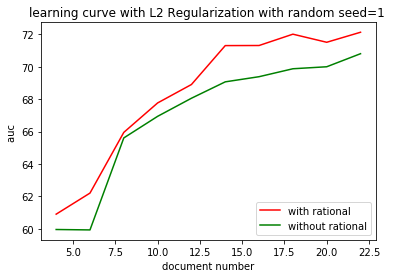

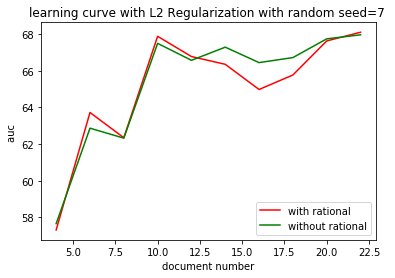

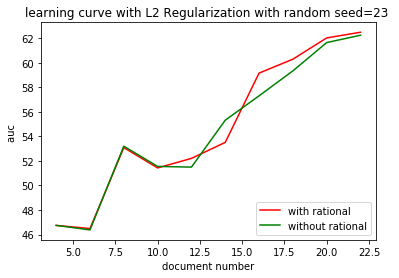

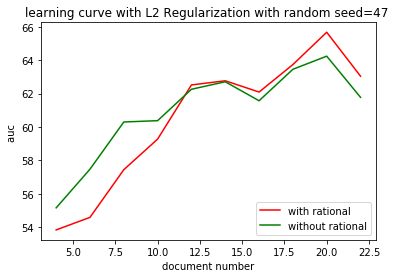

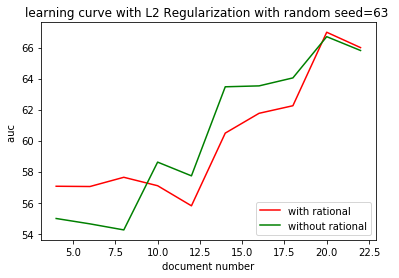

In [100]:
import matplotlib.pyplot as plt

plt.plot(document_num, with_rationale_auc[0], color='red',label='with rational')
plt.plot(document_num, without_rationale_auc[0], color='green',label='without rational')
#plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('document number')
plt.ylabel('auc ')
plt.title('learning curve with L2 Regularization with random seed=1 ')
plt.legend(loc="lower right")
plt.show()

import matplotlib.pyplot as plt
#for seed = 7
plt.plot(document_num, with_rationale_auc[1], color='red',label='with rational')
plt.plot(document_num, without_rationale_auc[1], color='green',label='without rational')
#plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('document number')
plt.ylabel('auc ')
plt.title('learning curve with L2 Regularization with random seed=7 ')
plt.legend(loc="lower right")
plt.show()

#for seed =23
import matplotlib.pyplot as plt
plt.plot(document_num, with_rationale_auc[2], color='red',label='with rational')
plt.plot(document_num, without_rationale_auc[2], color='green',label='without rational')
#plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('document number')
plt.ylabel('auc ')
plt.title('learning curve with L2 Regularization with random seed=23 ')
plt.legend(loc="lower right")
plt.show()

#for seed = 47
import matplotlib.pyplot as plt
plt.plot(document_num, with_rationale_auc[3], color='red',label='with rational')
plt.plot(document_num, without_rationale_auc[3], color='green',label='without rational')
#plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('document number')
plt.ylabel('auc ')
plt.title('learning curve with L2 Regularization with random seed=47 ')
plt.legend(loc="lower right")
plt.show()

#for seed = 63

import matplotlib.pyplot as plt
plt.plot(document_num, with_rationale_auc[4], color='red',label='with rational')
plt.plot(document_num, without_rationale_auc[4], color='green',label='without rational')
#plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('document number')
plt.ylabel('auc ')
plt.title('learning curve with L2 Regularization with random seed=63 ')
plt.legend(loc="lower right")
plt.show()

# FOR ACCURACY FOR EACH RANDOM SEED FOR RATIONALS AND WITHOUT RATIONALS

/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


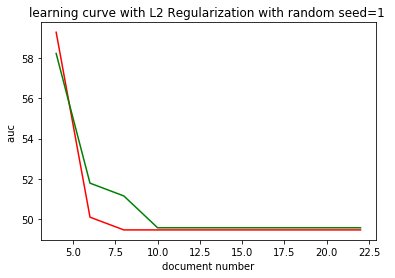

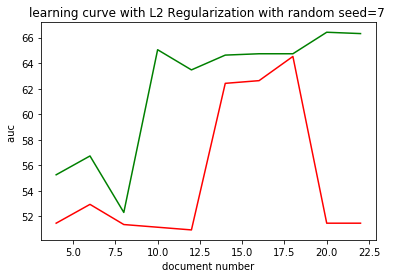

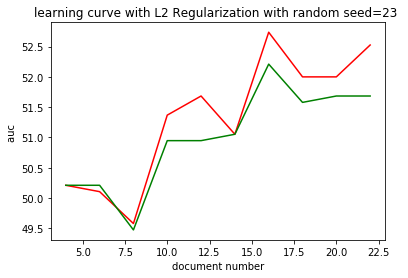

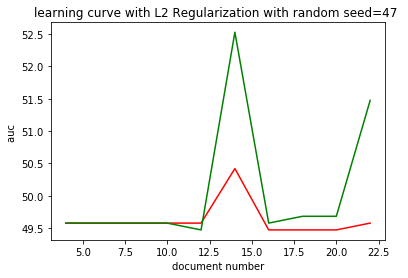

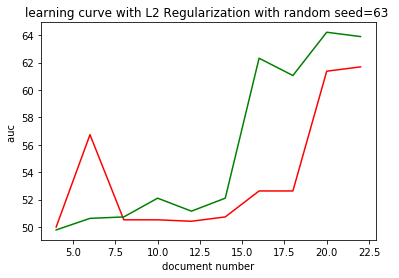

In [101]:
import matplotlib.pyplot as plt

plt.plot(document_num, with_rationale_accuracy[0], color='red')
plt.plot(document_num, without_rationale_accuracy[0], color='green')
#plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('document number')
plt.ylabel('auc ')
plt.title('learning curve with L2 Regularization with random seed=1 ')
plt.legend(loc="lower right")
plt.show()

import matplotlib.pyplot as plt
#for seed = 7
plt.plot(document_num, with_rationale_accuracy[1], color='red')
plt.plot(document_num, without_rationale_accuracy[1], color='green')
#plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('document number')
plt.ylabel('auc ')
plt.title('learning curve with L2 Regularization with random seed=7 ')
plt.legend(loc="lower right")
plt.show()

#for seed =23
import matplotlib.pyplot as plt
plt.plot(document_num, with_rationale_accuracy[2], color='red')
plt.plot(document_num, without_rationale_accuracy[2], color='green')
#plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('document number')
plt.ylabel('auc ')
plt.title('learning curve with L2 Regularization with random seed=23 ')
plt.legend(loc="lower right")
plt.show()

#for seed = 47
import matplotlib.pyplot as plt
plt.plot(document_num, with_rationale_accuracy[3], color='red')
plt.plot(document_num, without_rationale_accuracy[3], color='green')
#plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('document number')
plt.ylabel('auc ')
plt.title('learning curve with L2 Regularization with random seed=47 ')
plt.legend(loc="lower right")
plt.show()

#for seed = 63

import matplotlib.pyplot as plt
plt.plot(document_num, with_rationale_accuracy[4], color='red')
plt.plot(document_num, without_rationale_accuracy[4], color='green')
#plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('document number')
plt.ylabel('auc ')
plt.title('learning curve with L2 Regularization with random seed=63 ')
plt.legend(loc="lower right")
plt.show()

# FOR MEAN AUC OF ALL THE RANDOM STATES FOR RATIONALS AND WITHOUT RATIONALS

In [102]:
R_AUC = with_rationale_auc
test = R_AUC
means_auc=[]


means_auc.append((sum(i[0] for i in test))/len(test))
means_auc.append((sum(i[1] for i in test))/len(test))
means_auc.append((sum(i[2] for i in test))/len(test))
means_auc.append((sum(i[3] for i in test))/len(test))
means_auc.append((sum(i[4] for i in test))/len(test))
means_auc.append((sum(i[5] for i in test))/len(test))
means_auc.append((sum(i[6] for i in test))/len(test))
means_auc.append((sum(i[7] for i in test))/len(test))
means_auc.append((sum(i[8] for i in test))/len(test))
means_auc.append((sum(i[9] for i in test))/len(test))



In [103]:
acc_with =without_rationale_auc
means_acc=[]


means_acc.append((sum(i[0] for i in acc_with))/len(acc_with))
means_acc.append((sum(i[1] for i in acc_with))/len(acc_with))
means_acc.append((sum(i[2] for i in acc_with))/len(acc_with))
means_acc.append((sum(i[3] for i in acc_with))/len(acc_with))
means_acc.append((sum(i[4] for i in acc_with))/len(acc_with))
means_acc.append((sum(i[5] for i in acc_with))/len(acc_with))
means_acc.append((sum(i[6] for i in acc_with))/len(acc_with))
means_acc.append((sum(i[7] for i in acc_with))/len(acc_with))
means_acc.append((sum(i[8] for i in acc_with))/len(acc_with))
means_acc.append((sum(i[9] for i in acc_with))/len(acc_with))

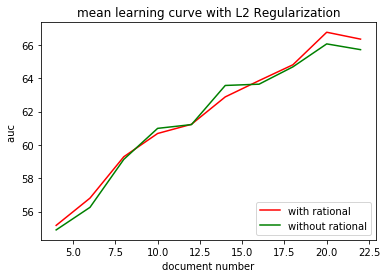

In [104]:
import matplotlib.pyplot as plt

plt.plot(document_num, means_auc, color='red',label='with rational' % means_auc)
plt.plot(document_num, means_acc, color='green',label='without rational' % means_acc)
#plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('document number')
plt.ylabel('auc ')
plt.title('mean learning curve with L2 Regularization')
plt.legend(loc="lower right")
plt.show()

# FOR MEAN ACCURACY OF ALL THE RANDOM STATES FOR RATIONALS AND WITHOUT RATIONALS

In [105]:
test1 = with_rationale_accuracy
means_auc1=[]


means_auc1.append((sum(i[0] for i in test1))/len(test1))
means_auc1.append((sum(i[1] for i in test1))/len(test1))
means_auc1.append((sum(i[2] for i in test1))/len(test1))
means_auc1.append((sum(i[3] for i in test1))/len(test1))
means_auc1.append((sum(i[4] for i in test1))/len(test1))
means_auc1.append((sum(i[5] for i in test1))/len(test1))
means_auc1.append((sum(i[6] for i in test1))/len(test1))
means_auc1.append((sum(i[7] for i in test1))/len(test1))
means_auc1.append((sum(i[8] for i in test1))/len(test1))
means_auc1.append((sum(i[9] for i in test1))/len(test1))


acc_with1 =without_rationale_accuracy
means_acc1=[]


means_acc1.append((sum(i[0] for i in acc_with1))/len(acc_with1))
means_acc1.append((sum(i[1] for i in acc_with1))/len(acc_with1))
means_acc1.append((sum(i[2] for i in acc_with1))/len(acc_with1))
means_acc1.append((sum(i[3] for i in acc_with1))/len(acc_with1))
means_acc1.append((sum(i[4] for i in acc_with1))/len(acc_with1))
means_acc1.append((sum(i[5] for i in acc_with1))/len(acc_with1))
means_acc1.append((sum(i[6] for i in acc_with1))/len(acc_with1))
means_acc1.append((sum(i[7] for i in acc_with1))/len(acc_with1))
means_acc1.append((sum(i[8] for i in acc_with1))/len(acc_with1))
means_acc1.append((sum(i[9] for i in acc_with1))/len(acc_with1))
means_acc1

[52.610526315789478,
 51.789473684210535,
 50.652631578947364,
 53.452631578947361,
 52.926315789473676,
 53.978947368421053,
 55.684210526315795,
 55.326315789473689,
 56.315789473684205,
 56.589473684210517]

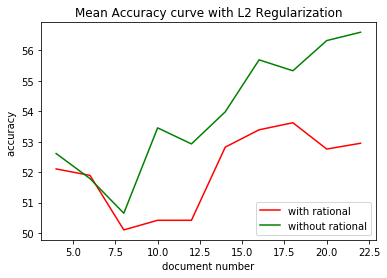

In [106]:
import matplotlib.pyplot as plt

plt.plot(document_num, means_auc1, color='red',label='with rational' % means_auc1)
plt.plot(document_num, means_acc1, color='green',label='without rational' % means_acc1)
#plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('document number')
plt.ylabel('accuracy ')
plt.title('Mean Accuracy curve with L2 Regularization')
plt.legend(loc="lower right")
plt.show()